In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key
from citipy import citipy
api_keys = weather_api_key


In [2]:
lat_lngs = []
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(f"Number of cities in the list: {len(cities)}")
city

Number of cities in the list: 588


'port glaud'

In [3]:
base_url="https://home.openweathermap.org/api_keys"
query_url=base_url +"&appid="+weather_api_key + "&q="
city_data=[]

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1
city_name=[]
city_humidity=[]
city_clouds=[]
city_country=[]
city_date=[]
city_lat=[]
city_lng=[]
city_max_temp=[]
city_wind=[]


response = requests.get(f'{query_url}{city}').json()
for city in cities:
    
    
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        city_clouds.append(response["clouds"]["all"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_humidity.append(response["main"]["humidity"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_wind.append(response["wind"]["speed"])
        print(f'Processing Record {record_count} | {city}')
        record_count = record_count + 1
    except KeyError:
        print(f'City not found. Skipping...')
    #time.sleep(1)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | fale old settlement
Processing Record 2 | shimoda
Processing Record 3 | carutapera
Processing Record 4 | albany
Processing Record 5 | puerto ayora
Processing Record 6 | yellowknife
Processing Record 7 | sergeyevka
Processing Record 8 | tommot
Processing Record 9 | raja
Processing Record 10 | ca mau
Processing Record 11 | ushuaia
Processing Record 12 | grytviken
Processing Record 13 | mana
Processing Record 14 | pontes e lacerda
Processing Record 15 | adamstown
Processing Record 16 | nova sintra
Processing Record 17 | argo
Processing Record 18 | gornopravdinsk
Processing Record 19 | coquimbo
Processing Record 20 | altay
Processing Record 21 | port-aux-francais
Processing Record 22 | hobyo
City not found. Skipping...
Processing Record 23 | carnarvon
Processing Record 24 | waiuku
Processing Record 25 | eirunepe
Processing Record 26 | vorgashor
Processing Record 27 | aroma
Processing Record 28 | ust-nera
Proc

In [4]:
City_data_frame =pd.DataFrame({
    "City":city_name,
 "Humidity":city_humidity,
 "Cloudiness":city_clouds,
 "Country":city_country,
 "Date":city_date,
 "Lat":city_lat,
 "Lng":city_lng,
 "Max Temp":city_max_temp,
 "Wind":city_wind
 })

City_data_frame.count()

City          560
Humidity      560
Cloudiness    560
Country       560
Date          560
Lat           560
Lng           560
Max Temp      560
Wind          560
dtype: int64

In [6]:
City_data_frame.head()

,City,Humidity,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind
0,Fale old settlement,72,12,TK,1690244679,-9.3852,-171.2468,301.89,7.94
1,Shimoda,71,7,JP,1690244679,34.6667,138.9500,302.35,2.18
2,Carutapera,88,11,BR,1690244686,-1.1950,-46.0200,297.91,2.53
3,Albany,84,71,US,1690244625,42.6001,-73.9662,297.36,2.51
4,Puerto Ayora,96,67,EC,1690244689,-0.7393,-90.3518,300.13,4.02


In [7]:
City_data_frame.to_csv("cities.csv", index_label="City_ID")
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")
city_data_df.head()


,City,Humidity,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind
City_ID,,,,,,,,,
0,Fale old settlement,72,12,TK,1690244679,-9.3852,-171.2468,301.89,7.94
1,Shimoda,71,7,JP,1690244679,34.6667,138.9500,302.35,2.18
2,Carutapera,88,11,BR,1690244686,-1.1950,-46.0200,297.91,2.53
3,Albany,84,71,US,1690244625,42.6001,-73.9662,297.36,2.51
4,Puerto Ayora,96,67,EC,1690244689,-0.7393,-90.3518,300.13,4.02


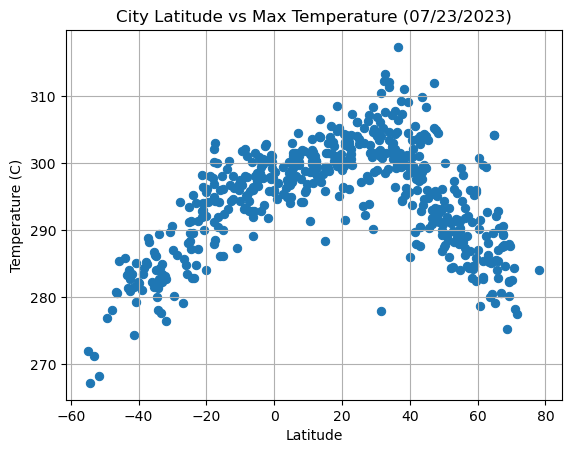

In [8]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("City Latitude vs Max Temperature (07/23/2023)")
plt.grid()
plt.savefig("Fig1.png")

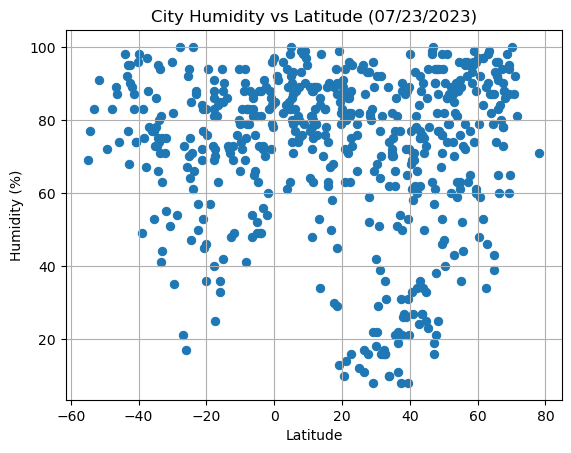

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs Latitude (07/23/2023)")
plt.grid()
plt.savefig("Fig2.png")

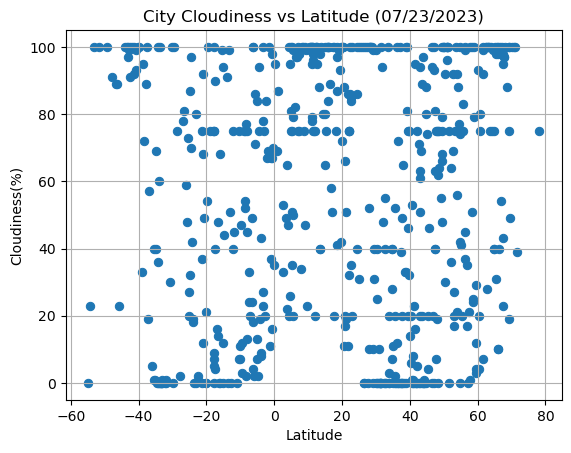

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Cloudiness vs Latitude (07/23/2023)")
plt.grid()
plt.savefig("Fig3.png")

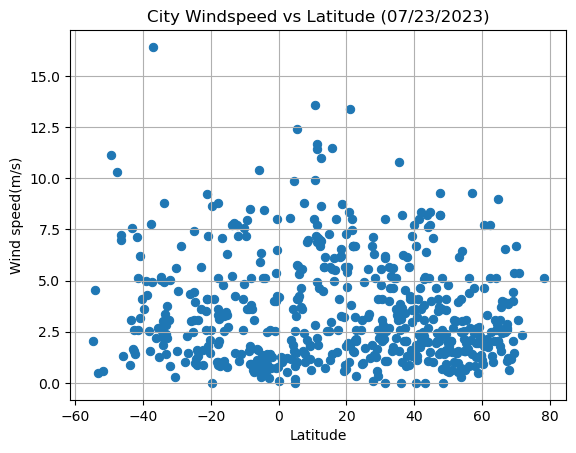

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Wind speed(m/s)")
plt.title("City Windspeed vs Latitude (07/23/2023)")
plt.grid()
plt.savefig("Fig4.png")

In [18]:
linear_regression = linregress(city_data_df['Lat'],city_data_df['Max Temp'])

In [13]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Humidity,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind
City_ID,,,,,,,,,
1,Shimoda,71,7,JP,1690244679,34.6667,138.9500,302.35,2.18
3,Albany,84,71,US,1690244625,42.6001,-73.9662,297.36,2.51
5,Yellowknife,34,100,CA,1690244684,62.4560,-114.3525,299.44,5.14
6,Sergeevka,63,92,KZ,1690244690,53.8800,67.4158,288.74,2.51
7,Tommot,74,100,RU,1690244690,58.9564,126.2925,295.30,0.50


In [20]:
southern_hemi_df= city_data_df.loc[city_data_df['Lat'] <= 0]
southern_hemi_df.head()

,City,Humidity,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind
City_ID,,,,,,,,,
0,Fale old settlement,72,12,TK,1690244679,-9.3852,-171.2468,301.89,7.94
2,Carutapera,88,11,BR,1690244686,-1.1950,-46.0200,297.91,2.53
4,Puerto Ayora,96,67,EC,1690244689,-0.7393,-90.3518,300.13,4.02
10,Ushuaia,69,0,AR,1690244691,-54.8000,-68.3000,271.96,2.06
11,Grytviken,77,23,GS,1690244691,-54.2811,-36.5092,267.24,4.54


The r-squared is: -0.585


Text(0, 0.5, 'Max Temp')

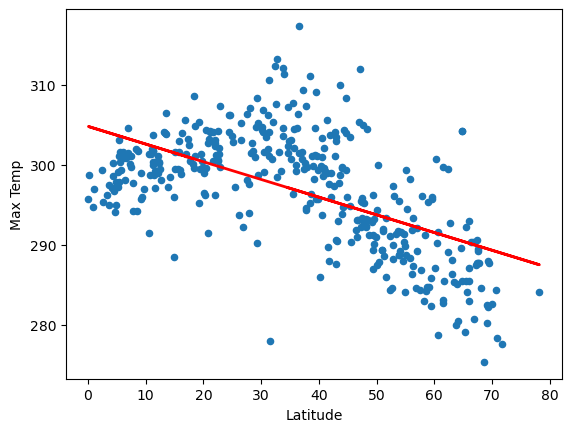

In [34]:
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')


plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The r-squared is: 0.859


Text(0, 0.5, 'Max Temp')

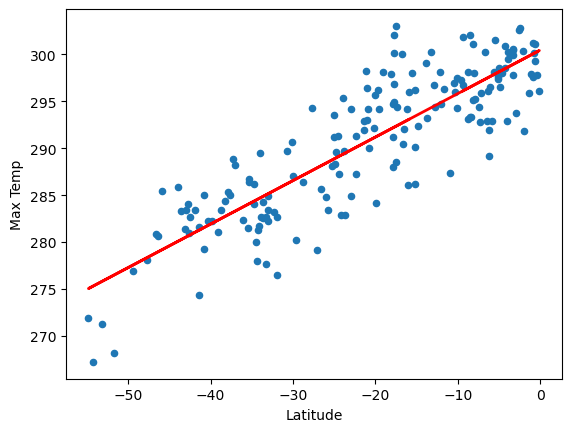

In [35]:
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')


plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The r-squared is: -0.003


Text(0, 0.5, 'Humidity')

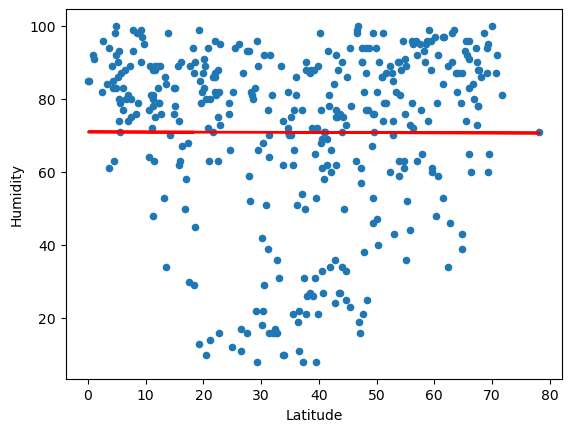

In [37]:
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')


plt.xlabel('Latitude')
plt.ylabel('Humidity')


The r-squared is: -0.092


Text(0, 0.5, 'Humidity')

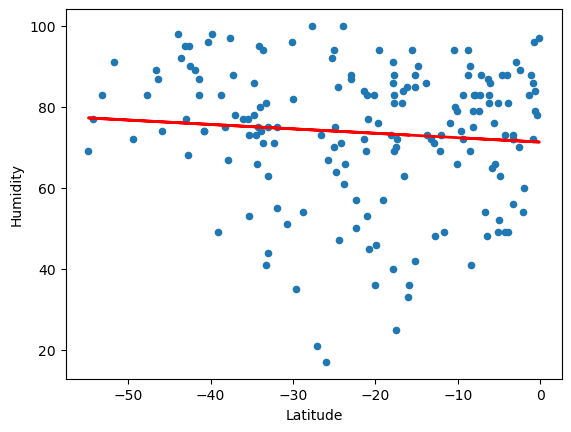

In [36]:
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')


plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r-squared is: -0.109


Text(0, 0.5, 'Cloudiness')

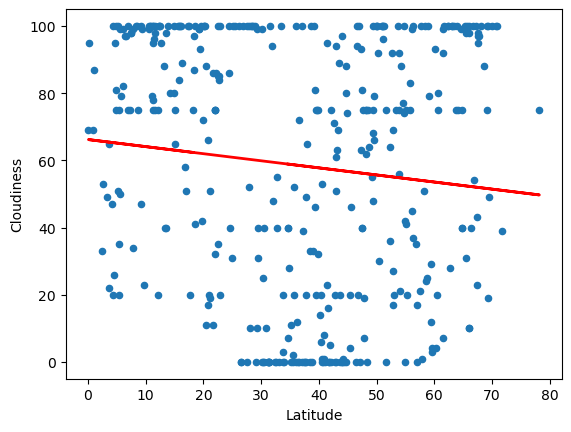

In [39]:
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


The r-squared is: -0.174


Text(0, 0.5, 'Cloudiness')

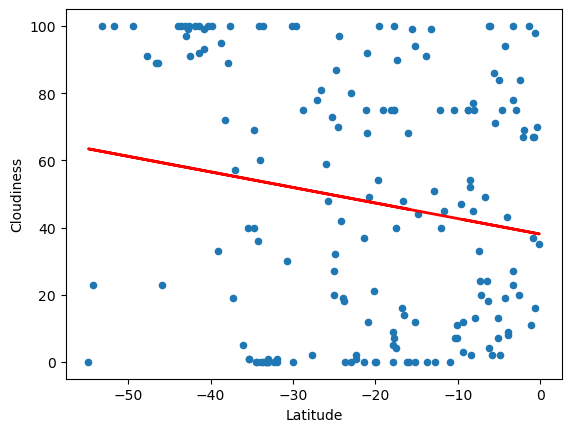

In [44]:
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')

#plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-squared is: -0.208


Text(0, 0.5, 'Wind')

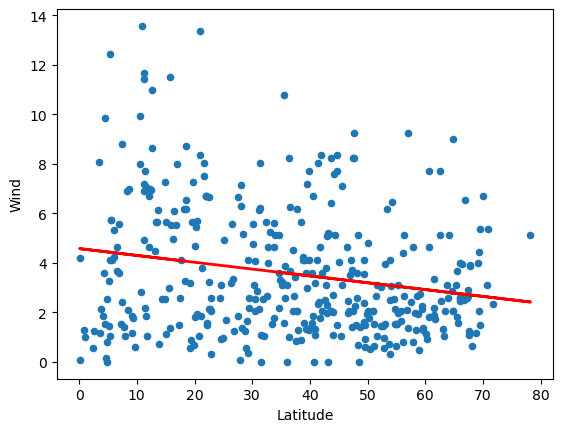

In [42]:
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')


plt.xlabel('Latitude')
plt.ylabel('Wind')

The r-squared is: -0.125


Text(0, 0.5, 'Wind')

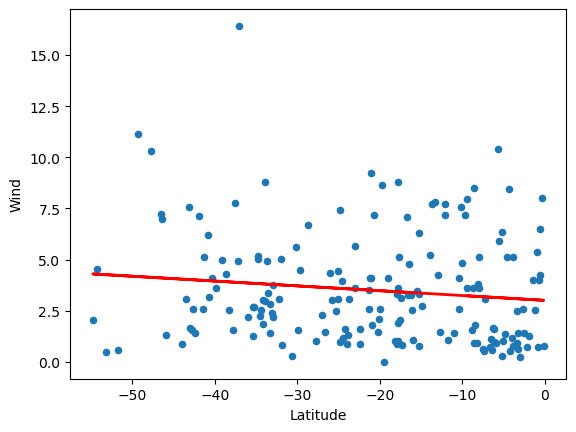

In [43]:
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 2,
    color = 'red')


plt.xlabel('Latitude')
plt.ylabel('Wind')